## Import those LIBRARIES

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import those FILES

In [73]:
## Vanessa's data
original = pd.read_csv('inequality_data.csv')

In [74]:
## WIID (I think)
income = pd.read_csv('income.csv')

## Explore

In [127]:
## Find the nullllllllsssss
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13167 entries, 0 to 13166
Data columns (total 68 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           13167 non-null  int64  
 1   id                   13167 non-null  int64  
 2   country              13167 non-null  object 
 3   c3                   13167 non-null  object 
 4   c2                   13159 non-null  object 
 5   year                 13167 non-null  int64  
 6   gini                 13090 non-null  float64
 7   ge0                  7353 non-null   float64
 8   ge1                  8603 non-null   float64
 9   ge2                  7372 non-null   float64
 10  a025                 6827 non-null   float64
 11  a050                 8584 non-null   float64
 12  a075                 6827 non-null   float64
 13  a1                   8542 non-null   float64
 14  palma                11572 non-null  float64
 15  ratio_top20bottom20  11780 non-null 

### Making a combined Quality metric by assigning a scale 
### to high avg low and scaling to match the quality score

In [142]:
income['quality'].value_counts()

High         11408
Average       1659
Low             86
Not known       14
Name: quality, dtype: int64

In [144]:
income['quality'] = income['quality'].replace({'High':3,'Average':2,'Low':1,'Not known':0})

In [146]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
income_test = income.copy()
income_test[['A', 'B']] = scaler.fit_transform(income[['quality', 'quality_score']])

In [148]:
income_test['combined_quality'] = income_test['A'] + income_test['B']

### Finding the max combined quality score per country and year, putting into a df

In [165]:
maxes = income_test.groupby(['country','year'])['combined_quality'].max().reset_index()

In [167]:
maxes.head()

,country,year,combined_quality
0,Afghanistan,2008,1.888889
1,Afghanistan,2012,1.888889
2,Afghanistan,2017,1.888889
3,Albania,2002,1.666667
4,Albania,2005,1.666667


### Merging with the income data to add an extra col to filter on

In [169]:
qualities = pd.merge(income_test, maxes, how = 'left', on=['country','year'])

In [170]:
qualities.columns

Index(['Unnamed: 0', 'id', 'country', 'c3', 'c2', 'year', 'gini', 'ge0', 'ge1',
       'ge2', 'a025', 'a050', 'a075', 'a1', 'palma', 'ratio_top20bottom20',
       'bottom40', 'q1', 'q2', 'q3', 'q4', 'q5', 'd1', 'd2', 'd3', 'd4', 'd5',
       'd6', 'd7', 'd8', 'd9', 'd10', 'bottom5', 'top5', 'resource',
       'resource_detailed', 'scale', 'scale_detailed', 'sharing_unit',
       'reference_unit', 'areacovr', 'areacovr_detailed', 'popcovr',
       'popcovr_detailed', 'region_un', 'region_un_sub', 'region_wb', 'eu',
       'oecd', 'incomegroup', 'mean', 'median', 'currency', 'reference_period',
       'exchangerate', 'mean_usd', 'median_usd', 'gdp', 'population',
       'revision', 'quality', 'quality_score', 'source', 'source_detailed',
       'source_comments', 'survey', 'link', 'wiidcompanion', 'A', 'B',
       'combined_quality_x', 'combined_quality_y'],
      dtype='object')

In [172]:
## filtering out those not at the max value
qualities = qualities[qualities['combined_quality_x']==qualities['combined_quality_y']]

### New dataframe containing year, country, and gini score for that year

In [173]:
gini_avg = income_test.groupby(['country','year'])['gini'].mean().reset_index()

In [176]:
gini_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  1706 non-null   object 
 1   year     1706 non-null   int64  
 2   gini     1694 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.1+ KB


In [79]:
original.rename(columns={"Country Name": "country", "Year": "year","Gini index (World Bank estimate) - SI.POV.GINI":"gini"}, errors="raise",inplace=True)

In [201]:
testing = pd.merge(original, gini_avg, how = 'left', on=['country','year'])

In [204]:
testing['new_gini'] = testing[['gini_x','gini_y']].bfill(axis=1).iloc[:,0]

In [205]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 0 to 3286
Data columns (total 24 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Unnamed: 0                                                                           3287 non-null   int64  
 1   country                                                                              3287 non-null   object 
 2   Country Code                                                                         3287 non-null   object 
 3   year                                                                                 3287 non-null   int64  
 4   Continent                                                                            3285 non-null   object 
 5   World Regions (UN SDG Definition)                                                    3285 

## Out of Interest

<AxesSubplot:>

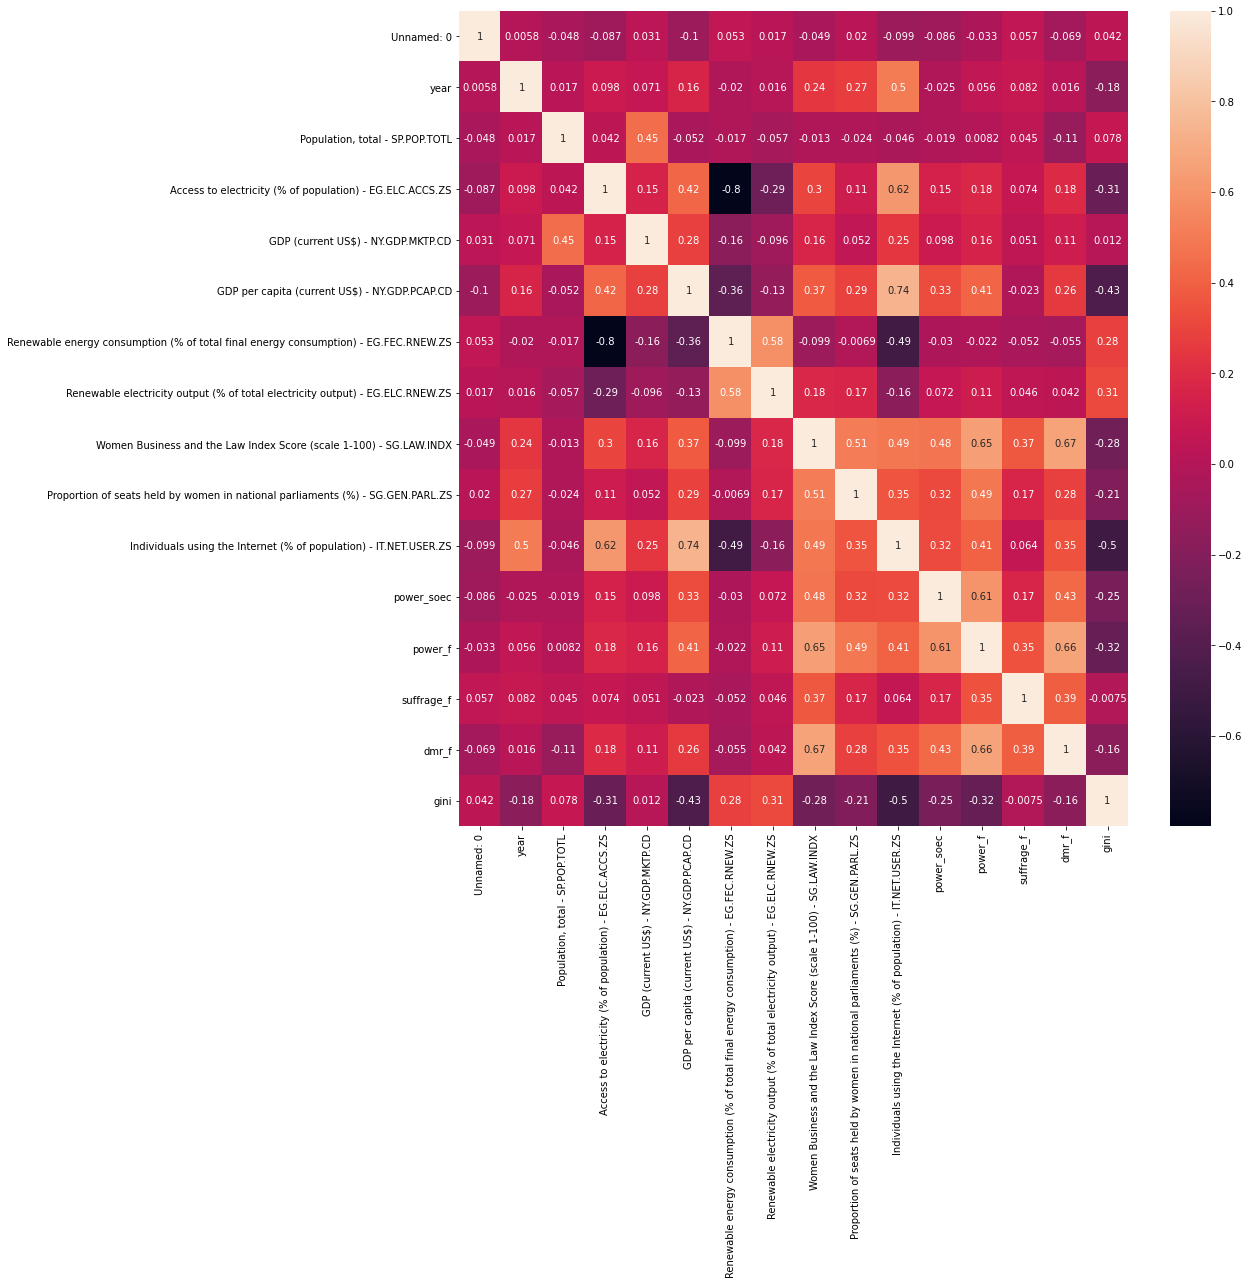

In [206]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(original.corr(), annot=True)